In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Data Preparation

In [4]:
data= pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### 2. Exploratory Data Analysis (EDA)

In [9]:
#the column olspeak has 62 null values which has to be handled
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())


In [12]:
#convert categorical variables into category type
categorical_cols=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for cols in categorical_cols:
    data[cols]=data[cols].astype('category')


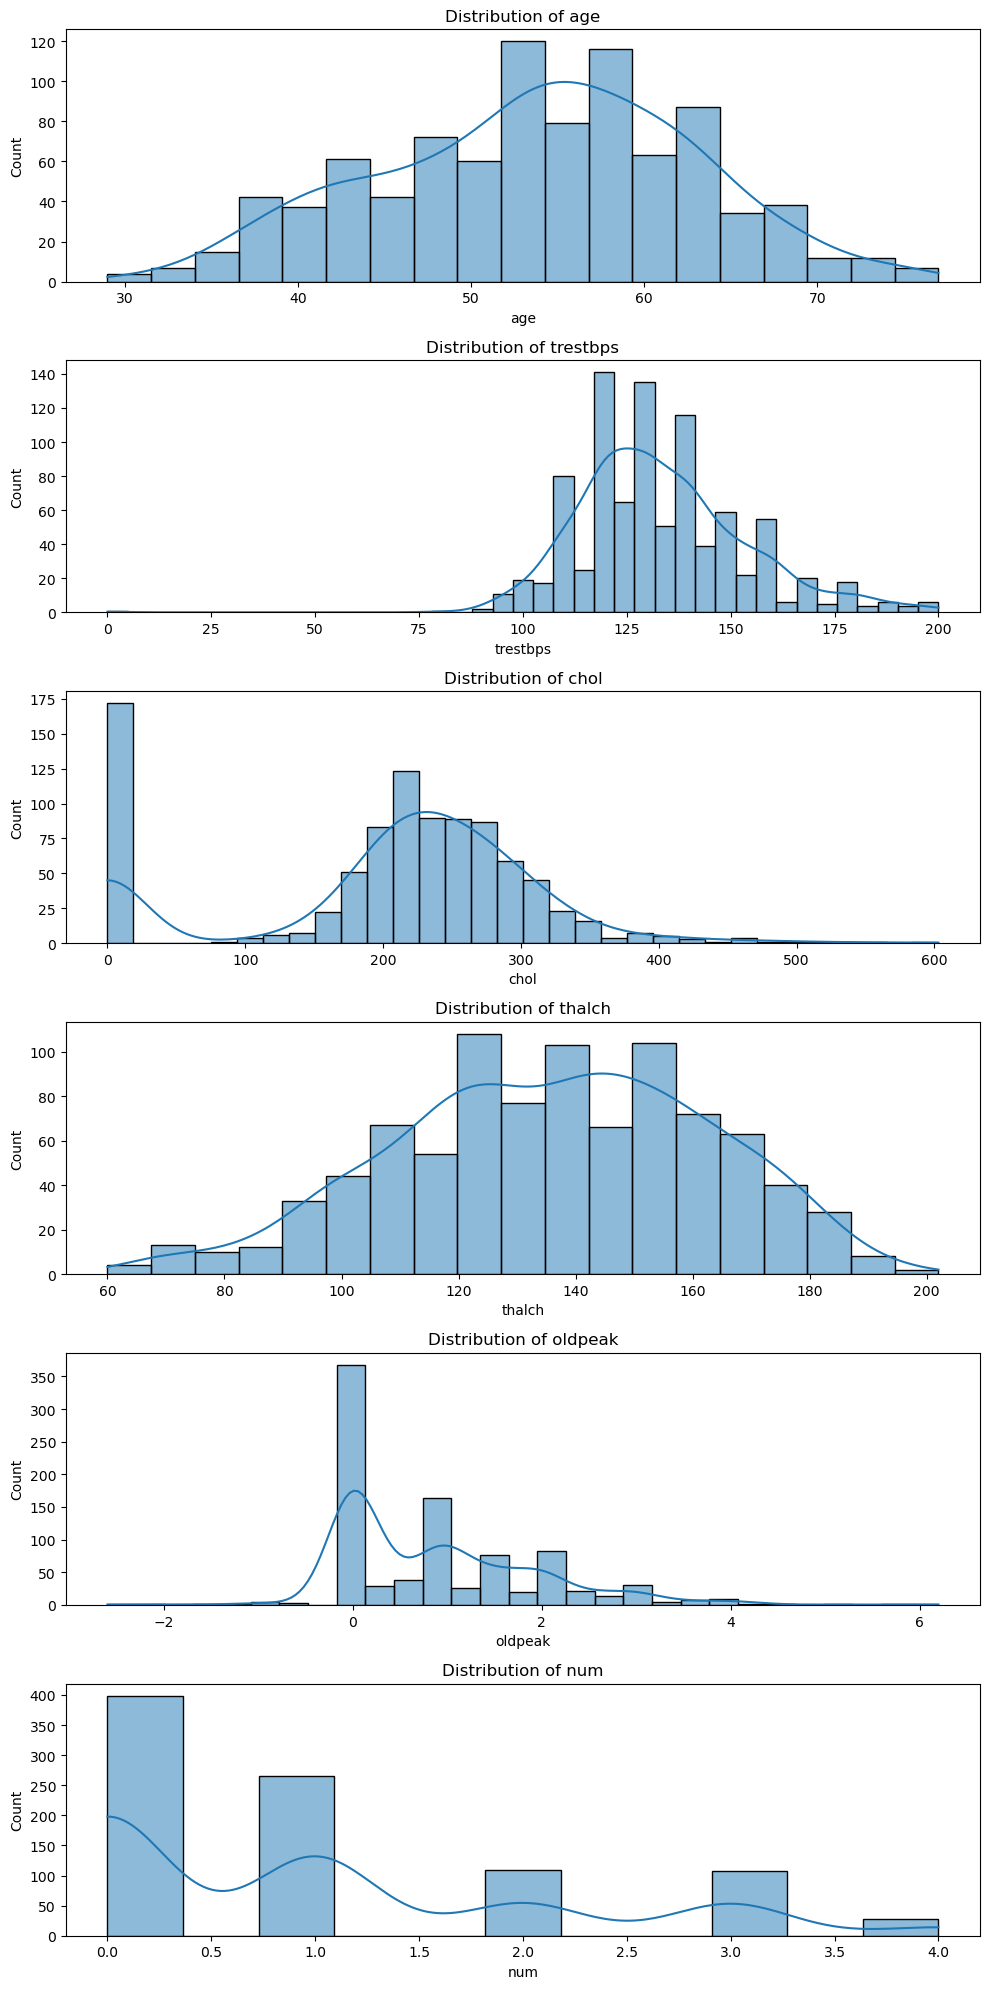

In [17]:
# visualising numerical features
numerical_cols=data.select_dtypes(include=['int64','float64']).columns
fig, axs = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

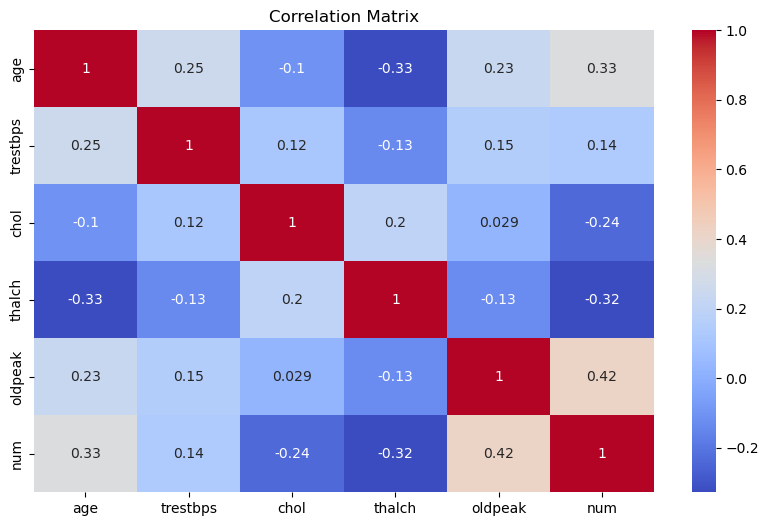

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. Feature Engineering

In [25]:
data_encoded=data.copy()
# Convert all categorical values to strings
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    data_encoded[col] = data_encoded[col].astype(str)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in categorical_cols:
    data_encoded[cols]=le.fit_transform(data_encoded[cols])
#change the target as either 1 or 0
data_encoded['target']=data_encoded['num'].apply(lambda x:0 if x==0 else 1)
data_encoded.drop('num', axis=1, inplace=True)

### 4. Decision Tree Classification

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [29]:
#split the dataset
x=data_encoded.drop(columns='target')
y=data_encoded['target']

In [31]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred=clf.predict(x_test)

In [35]:
print("\nClassification Report:\n", classification_report(y_test,y_pred)),
print("\nconfusion matrix:\n", confusion_matrix(y_test,y_pred)),
print("\naccuracy score:\n", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72        89
           1       0.75      0.67      0.70        93

    accuracy                           0.71       182
   macro avg       0.72      0.72      0.71       182
weighted avg       0.72      0.71      0.71       182


confusion matrix:
 [[68 21]
 [31 62]]

accuracy score:
 0.7142857142857143


##### we can see that the accuracy of the model is 71% as we did not choose any hyperparameters. we can do hyperparameter tuning to improve the accuracy score

### 5. Hyperparameter Tuning

In [89]:
param_grid={
    'max_depth':[3,5,10,None],
    'min_samples_split':[7,6,5],
    'criterion':['gini','entropy']}
from sklearn.model_selection import GridSearchCV
#use gridsearch
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [7, 6, 5]},
             scoring='accuracy')

In [90]:
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}


In [91]:
# Evaluate tuned model
y_pred_best = best_model.predict(x_test)
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nTuned Accuracy Score:", accuracy_score(y_test, y_pred_best))


Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        89
           1       0.76      0.80      0.77        93

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182


Tuned Accuracy Score: 0.7637362637362637


##### we can see that after hyperparameter tuning the accuracy score has improved to 77%. it can be improved further by choosing better hyperparameters

### 6.Visualize the Decision Tree

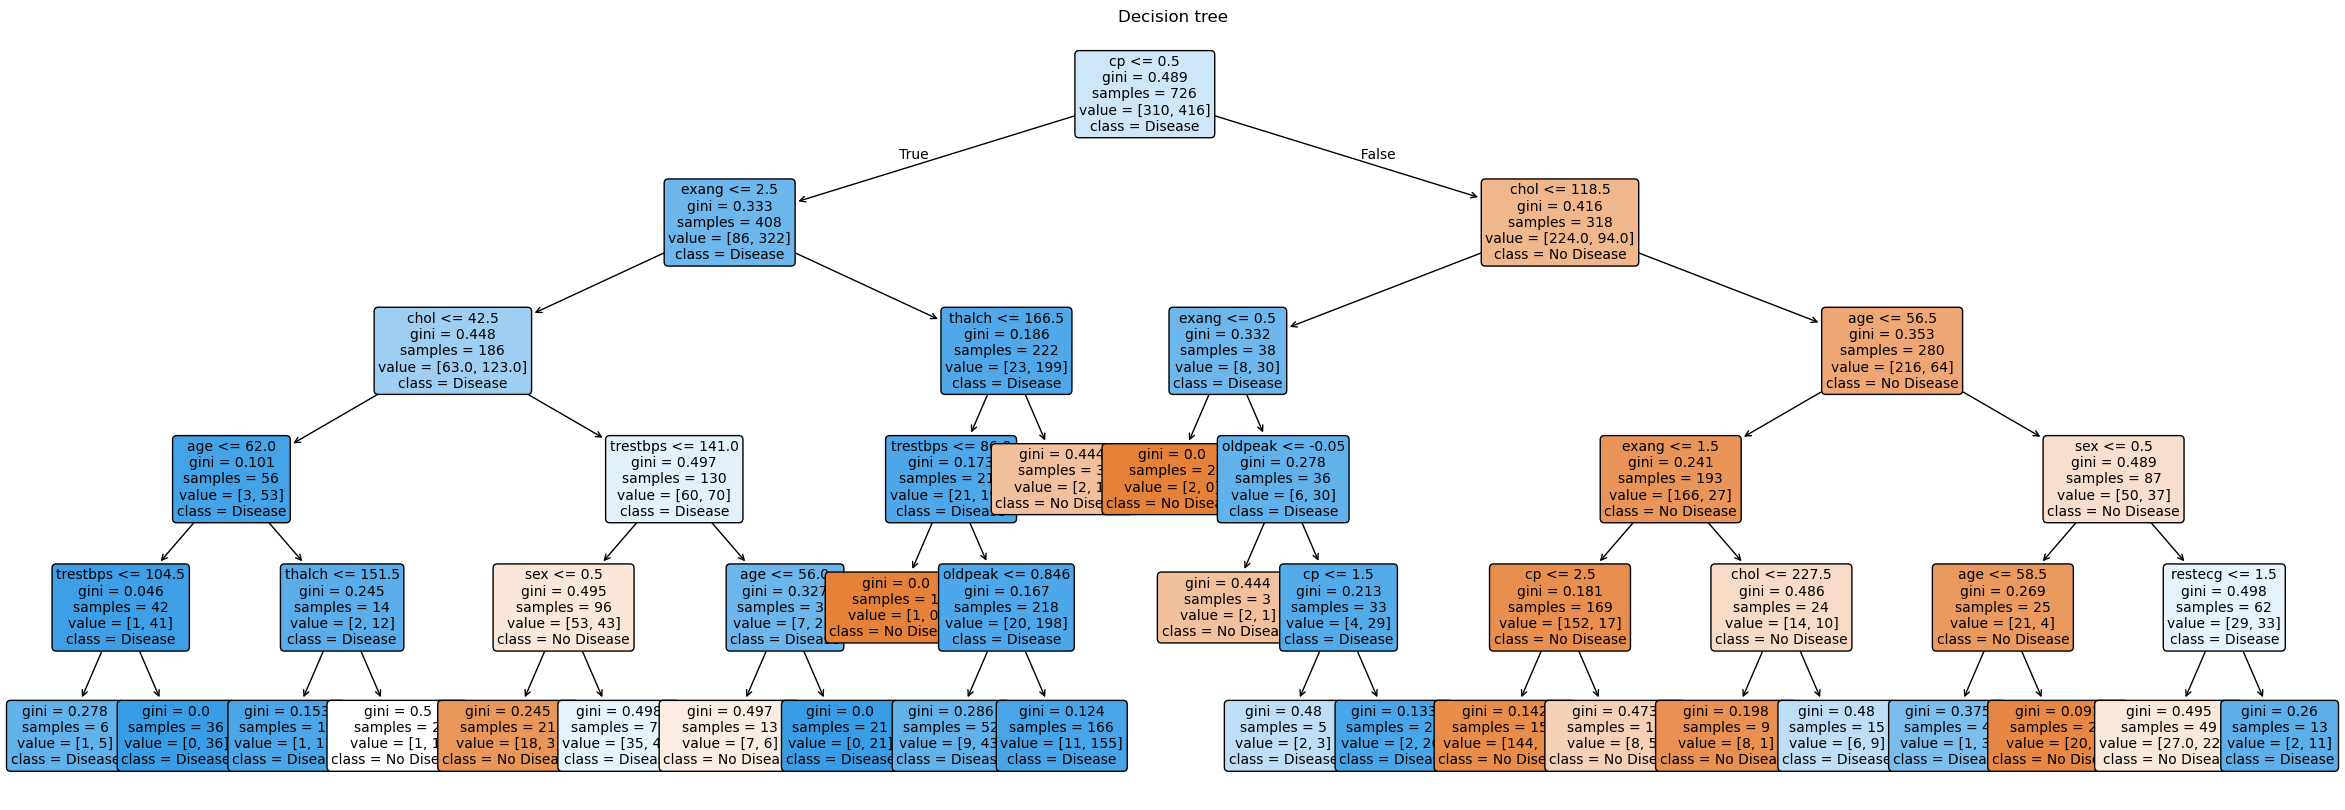

In [92]:
plt.figure(figsize=(30,10))
plot_tree(best_model, feature_names=x.columns, class_names=['No Disease','Disease'], filled=True,rounded=True,fontsize=10)
plt.title("Decision tree")
plt.show()

### interview questions

##### 1. max_depth controls how deep the tree can go; deeper trees may overfit.min_samples_split and min_samples_leaf prevent the tree from creating overly specific rules and reduce overfitting. criterion decides on what basis the split is made

##### 2. Label Encoding assigns each category a unique number, introducing order which may mislead some models.
##### One-hot Encoding creates binary columns for each category, avoiding any ordinal relationships.
##### Use Label Encoding for tree-based models; use One-hot Encoding for linear models or distance-based algorithms.